In [4]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import requests
import urllib.request
#import selenium
#from selenium import webdriver
#from selenium.webdriver.chrome.options import Options

import pandas as pd
import scipy as sc
import numpy as np
import time
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
from string import ascii_lowercase

In [5]:
career_pergame = pd.read_csv('career_pergame.csv',index_col=0)

In [6]:
career_per36 = pd.read_csv('career_per36.csv',index_col=0)

In [7]:
career_per100 = pd.read_csv('career_per100.csv',index_col=0)

In [8]:
career_advanced = pd.read_csv('career_advanced.csv',index_col=0)

In [9]:
career_pergame = career_pergame.set_index('Name')

In [10]:
career_per36 = career_per36.set_index('Name')

In [11]:
career_per100 = career_per100.set_index('Name')

In [12]:
career_advanced = career_advanced.set_index('Name')

In [13]:
dfs = [career_pergame,career_per36,career_per100,career_advanced]
career = dfs[0].join(dfs[1:])

In [14]:
cols = [c for c in career.columns if c.lower()[:5] != 'blank']

In [15]:
career = career[cols]

In [16]:
cols = [c for c in career.columns if c.lower()[len(c)-2:] != '_y']

In [17]:
career = career[cols]

In [18]:
career = career.loc[:,~career.columns.duplicated()]

In [19]:
career = career.drop('Year_x',axis=1)

In [20]:
career = career.drop('League_x',axis=1)

In [21]:
#Only want to run once for backup purposes
#career.to_csv('career.csv')

In [22]:
career['Percent_Games_Started'] = career['Games Started_x']/career['Games Played_x']

In [23]:
#rookie datasets
rookie_pergame = pd.read_csv('per_game.csv', index_col = 0)

In [24]:
rookie_per36 = pd.read_csv('per_36.csv', index_col = 0)

In [25]:
rookie_per100 = pd.read_csv('per_100.csv', index_col = 0)

In [26]:
rookie_advanced = pd.read_csv('rookie_advanced.csv', index_col = 0)

In [27]:
rookie_pergame = rookie_pergame.set_index('Name')

In [28]:
rookie_per36 = rookie_per36.set_index('Name')

In [29]:
rookie_per100 = rookie_per100.set_index('Name')

In [30]:
rookie_advanced = rookie_advanced.set_index('Name')

In [31]:
dfs = [rookie_pergame, rookie_per36, rookie_per100, rookie_advanced]
rookie = dfs[0].join(dfs[1:])

In [32]:
rookie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3731 entries, A.C. Green to Zydrunas Ilgauskas
Columns: 120 entries, Year_x to VORP
dtypes: float64(101), int64(3), object(16)
memory usage: 3.4+ MB


In [33]:
cols = [c for c in rookie.columns if c.lower()[:5] != 'blank']

In [34]:
rookie = rookie[cols]

In [35]:
cols = [c for c in rookie.columns if c.lower()[len(c)-2:] != '_y']

In [36]:
rookie = rookie[cols]

In [37]:
rookie = rookie.loc[:,~rookie.columns.duplicated()]

In [38]:
rookie = rookie.drop(['Year_x','Team_x','League_x'],axis=1)

In [39]:
rookie['Percent_Games_Started'] = rookie['Games Started_x']/rookie['Games Played_x']

In [40]:
awards = pd.read_csv('career_awards.csv',index_col=1)

In [41]:
awards = awards.drop('Unnamed: 0',axis=1)

In [42]:
rookie_awards = awards[['All-Rookie Team','ROY']]

In [43]:
rookie = rookie.reset_index(level=0)
rookie_awards = rookie_awards.reset_index(level=0)

In [44]:
rookie_awards = rookie_awards.drop_duplicates(subset=['Name'])

In [45]:
rookie_w_awards = pd.merge(rookie,rookie_awards,on='Name',how='inner')

In [46]:
career

,Games Played_x,Games Started_x,MinPerGame,FGPerGame,FGAPerGame,FG%PerGame,3pPerGame,3PAPerGame,3p%PerGame,2pPerGame,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Percent_Games_Started
Name,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1278,832.0,28.6,3.6,7.2,0.494,0.1,0.4,0.254,3.5,...,14.8,58.3,41.2,99.5,0.131,0.0,0.5,0.4,22.2,0.651017
A.J. Bramlett,8,0.0,7.6,0.5,2.6,0.190,0.0,0.0,NaN,0.5,...,17.1,-0.2,0.1,-0.2,-0.129,-10.5,-6.3,-16.8,-0.2,0.000000
A.J. English,151,18.0,20.6,4.1,9.4,0.435,0.1,0.4,0.138,4.0,...,23.9,-0.3,1.4,1.1,0.017,-2.2,-2.9,-5.1,-2.4,0.119205
A.J. Guyton,80,14.0,15.6,2.1,5.5,0.377,0.9,2.4,0.378,1.2,...,19.3,0.3,-0.1,0.3,0.010,-1.0,-4.4,-5.4,-1.1,0.175000
A.J. Hammons,22,0.0,7.4,0.8,1.9,0.405,0.2,0.5,0.500,0.5,...,17.6,-0.2,0.2,0.0,-0.001,-7.5,2.0,-5.6,-0.1,0.000000
A.J. Price,261,25.0,15.1,2.1,5.5,0.380,0.8,2.6,0.316,1.3,...,20.5,1.2,3.5,4.7,0.058,-0.3,-2.1,-2.4,-0.4,0.095785
A.J. Wynder,6,0.0,6.5,0.5,2.0,0.250,0.0,0.2,0.000,0.5,...,21.1,-0.1,0.0,0.0,-0.051,-5.9,-3.5,-9.4,-0.1,0.000000
Aaron Brooks,642,183.0,20.9,3.5,8.5,0.413,1.3,3.4,0.370,2.2,...,23.1,10.5,8.7,19.2,0.069,0.7,-2.4,-1.8,0.8,0.285047
Aaron Gordon,249,160.0,25.9,4.2,9.3,0.456,0.9,2.9,0.310,3.3,...,19.7,6.8,5.9,12.7,0.095,-0.1,0.1,0.0,3.2,0.642570


In [47]:
career_awards = awards[['MVPs','All-Star Games','All-NBA Teams']]

In [48]:
career_awards = career_awards.reset_index(level=0)
career = career.reset_index(level=0)

In [49]:
career_awards = career_awards.drop_duplicates(subset=['Name'])

In [50]:
career_w_awards = pd.merge(career,career_awards,on='Name',how='inner')

In [51]:
print(career_w_awards.shape)
print(rookie_w_awards.shape)

(3731, 97)
(3731, 98)


In [94]:
#Run once for backup
career_w_awards.to_csv('career_w_awards.csv')
rookie_w_awards.to_csv('rookie_w_awards.csv')

In [53]:
rookie

,Name,Age_x,Position_x,Games Played_x,Games Started_x,MinPerGame,FGPerGame,FGAPerGame,FG%PerGame,3pPerGame,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Percent_Games_Started
0,A.C. Green,22.0,PF,82,1.0,18.8,2.5,4.7,0.539,0.0,...,14.7,1.4,2.0,3.3,0.103,-0.5,0.8,0.3,0.9,0.012195
1,A.J. Bramlett,23.0,C,8,0.0,7.6,0.5,2.6,0.190,0.0,...,17.1,-0.2,0.1,-0.2,-0.129,-10.5,-6.3,-16.8,-0.2,0.000000
2,A.J. English,23.0,SG,70,12.0,20.6,3.6,8.2,0.439,0.0,...,21.8,-0.5,0.7,0.2,0.008,-2.5,-2.3,-4.8,-1.0,0.171429
3,A.J. Guyton,22.0,PG,33,8.0,19.1,2.4,5.8,0.406,0.8,...,16.5,0.4,-0.1,0.3,0.020,-1.5,-4.4,-5.9,-0.6,0.242424
4,A.J. Hammons,24.0,C,22,0.0,7.4,0.8,1.9,0.405,0.2,...,17.6,-0.2,0.2,0.0,-0.001,-7.5,2.0,-5.6,-0.1,0.000000
5,A.J. Price,23.0,PG,56,2.0,15.4,2.6,6.3,0.410,1.1,...,22.7,0.4,0.8,1.2,0.065,0.2,-2.0,-1.8,0.0,0.035714
6,A.J. Wynder,26.0,PG,6,0.0,6.5,0.5,2.0,0.250,0.0,...,21.1,-0.1,0.0,0.0,-0.051,-5.9,-3.5,-9.4,-0.1,0.000000
7,Aaron Brooks,23.0,PG,51,0.0,11.9,1.8,4.4,0.413,0.7,...,21.8,0.6,0.8,1.4,0.112,0.0,-1.8,-1.8,0.0,0.000000
8,Aaron Gordon,19.0,PF,47,8.0,17.0,2.0,4.4,0.447,0.3,...,15.5,0.3,0.7,1.0,0.060,-2.8,0.0,-2.8,-0.2,0.170213
9,Aaron Gray,23.0,C,61,1.0,10.0,1.7,3.3,0.505,0.0,...,22.0,0.1,0.8,0.8,0.066,-2.4,0.4,-2.0,0.0,0.016393


In [96]:
#r for rookie c for career
players = rookie.merge(career, left_index=True, right_index=True, suffixes=["_r", "_c"])
players_w_awards = rookie_w_awards.merge(career_w_awards, left_index=True, right_index=True, suffixes = ["_r", "_c"])
players

,Name_r,Age_x,Position_x,Games Played_x_r,Games Started_x_r,MinPerGame_r,FGPerGame_r,FGAPerGame_r,FG%PerGame_r,3pPerGame_r,...,USG%_c,OWS_c,DWS_c,WS_c,WS/48_c,OBPM_c,DBPM_c,BPM_c,VORP_c,Percent_Games_Started_c
0,A.C. Green,22.0,PF,82,1.0,18.8,2.5,4.7,0.539,0.0,...,14.8,58.3,41.2,99.5,0.131,0.0,0.5,0.4,22.2,0.651017
1,A.J. Bramlett,23.0,C,8,0.0,7.6,0.5,2.6,0.190,0.0,...,17.1,-0.2,0.1,-0.2,-0.129,-10.5,-6.3,-16.8,-0.2,0.000000
2,A.J. English,23.0,SG,70,12.0,20.6,3.6,8.2,0.439,0.0,...,23.9,-0.3,1.4,1.1,0.017,-2.2,-2.9,-5.1,-2.4,0.119205
3,A.J. Guyton,22.0,PG,33,8.0,19.1,2.4,5.8,0.406,0.8,...,19.3,0.3,-0.1,0.3,0.010,-1.0,-4.4,-5.4,-1.1,0.175000
4,A.J. Hammons,24.0,C,22,0.0,7.4,0.8,1.9,0.405,0.2,...,17.6,-0.2,0.2,0.0,-0.001,-7.5,2.0,-5.6,-0.1,0.000000
5,A.J. Price,23.0,PG,56,2.0,15.4,2.6,6.3,0.410,1.1,...,20.5,1.2,3.5,4.7,0.058,-0.3,-2.1,-2.4,-0.4,0.095785
6,A.J. Wynder,26.0,PG,6,0.0,6.5,0.5,2.0,0.250,0.0,...,21.1,-0.1,0.0,0.0,-0.051,-5.9,-3.5,-9.4,-0.1,0.000000
7,Aaron Brooks,23.0,PG,51,0.0,11.9,1.8,4.4,0.413,0.7,...,23.1,10.5,8.7,19.2,0.069,0.7,-2.4,-1.8,0.8,0.285047
8,Aaron Gordon,19.0,PF,47,8.0,17.0,2.0,4.4,0.447,0.3,...,19.7,6.8,5.9,12.7,0.095,-0.1,0.1,0.0,3.2,0.642570
9,Aaron Gray,23.0,C,61,1.0,10.0,1.7,3.3,0.505,0.0,...,15.1,1.4,4.8,6.2,0.077,-2.8,0.9,-1.8,0.2,0.273585


In [97]:
players_w_awards

,Name_r,Age_x,Position_x,Games Played_x_r,Games Started_x_r,MinPerGame_r,FGPerGame_r,FGAPerGame_r,FG%PerGame_r,3pPerGame_r,...,WS_c,WS/48_c,OBPM_c,DBPM_c,BPM_c,VORP_c,Percent_Games_Started_c,MVPs,All-Star Games,All-NBA Teams
0,A.C. Green,22.0,PF,82,1.0,18.8,2.5,4.7,0.539,0.0,...,99.5,0.131,0.0,0.5,0.4,22.2,0.651017,0,1,0
1,A.J. Bramlett,23.0,C,8,0.0,7.6,0.5,2.6,0.190,0.0,...,-0.2,-0.129,-10.5,-6.3,-16.8,-0.2,0.000000,0,0,0
2,A.J. English,23.0,SG,70,12.0,20.6,3.6,8.2,0.439,0.0,...,1.1,0.017,-2.2,-2.9,-5.1,-2.4,0.119205,0,0,0
3,A.J. Guyton,22.0,PG,33,8.0,19.1,2.4,5.8,0.406,0.8,...,0.3,0.010,-1.0,-4.4,-5.4,-1.1,0.175000,0,0,0
4,A.J. Hammons,24.0,C,22,0.0,7.4,0.8,1.9,0.405,0.2,...,0.0,-0.001,-7.5,2.0,-5.6,-0.1,0.000000,0,0,0
5,A.J. Price,23.0,PG,56,2.0,15.4,2.6,6.3,0.410,1.1,...,4.7,0.058,-0.3,-2.1,-2.4,-0.4,0.095785,0,0,0
6,A.J. Wynder,26.0,PG,6,0.0,6.5,0.5,2.0,0.250,0.0,...,0.0,-0.051,-5.9,-3.5,-9.4,-0.1,0.000000,0,0,0
7,Aaron Brooks,23.0,PG,51,0.0,11.9,1.8,4.4,0.413,0.7,...,19.2,0.069,0.7,-2.4,-1.8,0.8,0.285047,0,0,0
8,Aaron Gordon,19.0,PF,47,8.0,17.0,2.0,4.4,0.447,0.3,...,12.7,0.095,-0.1,0.1,0.0,3.2,0.642570,0,0,0
9,Aaron Gray,23.0,C,61,1.0,10.0,1.7,3.3,0.505,0.0,...,6.2,0.077,-2.8,0.9,-1.8,0.2,0.273585,0,0,0


In [93]:
players.to_csv('players.csv')

0.668515140815
Intercept       2.420303e-124
PtsPerGame_r     0.000000e+00
dtype: float64


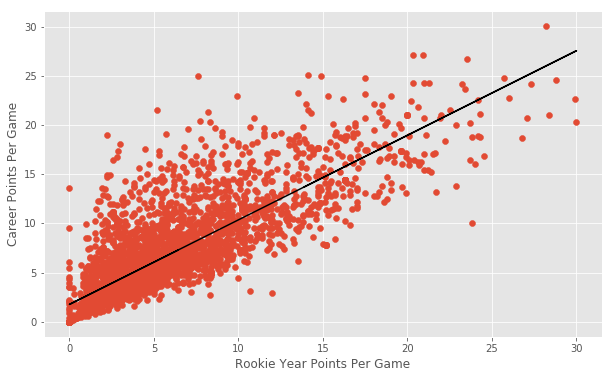

In [90]:
points_ols = sm.ols(formula = "PtsPerGame_c ~ PtsPerGame_r", data = players).fit()
#r for rookie c for career
plt.scatter(x = players["PtsPerGame_r"], y = players["PtsPerGame_c"])
plt.plot(players["PtsPerGame_r"], points_ols.predict(), color = 'k')
plt.xlabel('Rookie Year Points Per Game')
plt.ylabel('Career Points Per Game')
print(points_ols.rsquared)
print(points_ols.pvalues)

0.322563153515
Intercept            1.348210e-01
Games_Played_x_r    1.038649e-317
dtype: float64


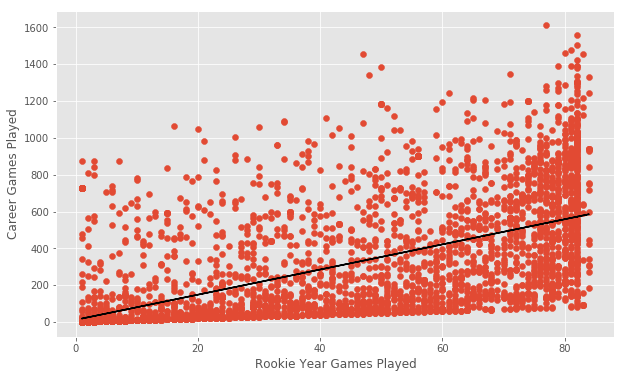

In [91]:
players = players.rename(columns = {"Games Played_x_c" : "Games_Played_x_c"})
players = players.rename(columns = {"Games Played_x_r" : "Games_Played_x_r"})

games_ols = sm.ols(formula = "Games_Played_x_c ~ Games_Played_x_r", data = players).fit()
plt.scatter(x = players["Games_Played_x_r"], y = players["Games_Played_x_c"])
plt.plot(players["Games_Played_x_r"], games_ols.predict(), color = 'k')
plt.xlabel('Rookie Year Games Played')
plt.ylabel('Career Games Played')
print(games_ols.rsquared)
print(games_ols.pvalues)

after doing some initial correlations we can see that career point and career games played are correlated. It stands to reason that most of the other general stats will also be correlated with each other but I will go back and verify later. Its interesting to note the difference between the two correlations (.67 rsquared vs .32 rsquared). 

In [107]:
#lets look at rookie awards vs career awards
players_w_awards.rename(columns = {"All-NBA Teams" : "all_NBA_Teams", "All-Rookie Team" : "all_Rookie_Team"})

awards_ols = sm.ols(formula = "all_NBA_Teams ~ all_Rookie_Team", data = players).fit()
plt.scatter(x = players_w_awards["All_Rookie_Team"], y = players_w_awards["All_NBA_Teams"])
plt.plot(players_w_awards["All_Rookie_Team"], games_ols.predict(), color = 'k')
plt.xlabel('Rookie Year Games Played')
plt.ylabel('Career Games Played')
print(awards_ols.rsquared)
print(awards_ols.pvalues)

PatsyError: Error evaluating factor: NameError: name 'all_Rookie_Team' is not defined
    all_NBA_Teams ~ all_Rookie_Team
                    ^^^^^^^^^^^^^^^